# Worksheet 10

Name:  Isaac Chan
UID: U93997706

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures.

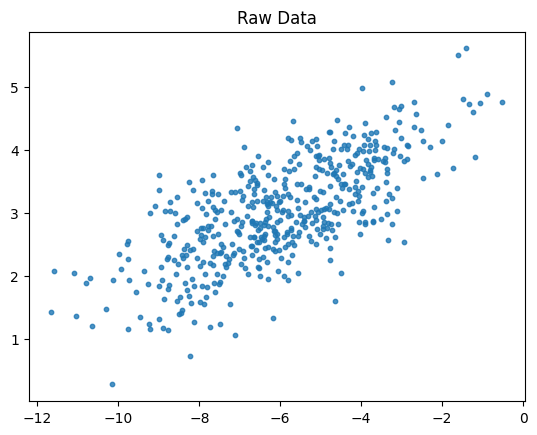

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

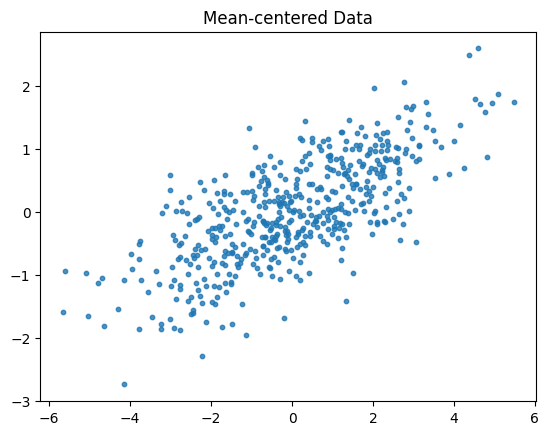

In [2]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

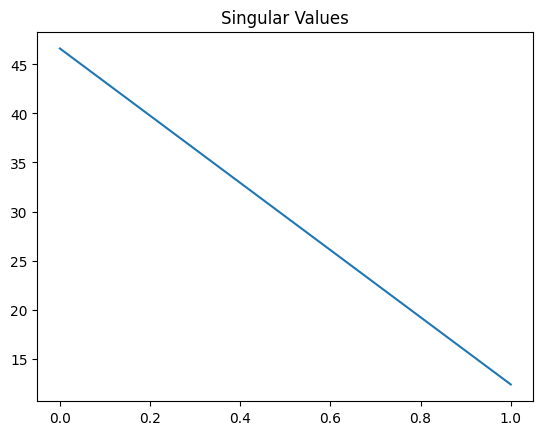

In [3]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

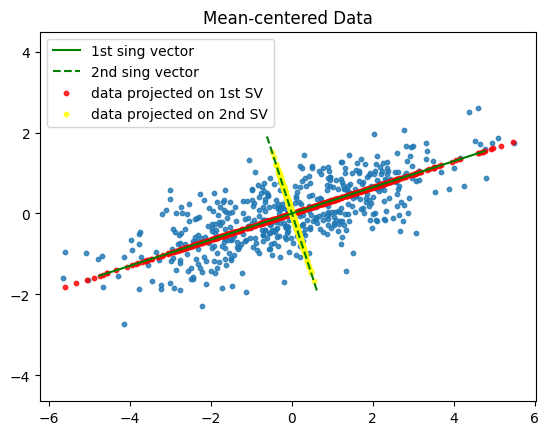

In [4]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()


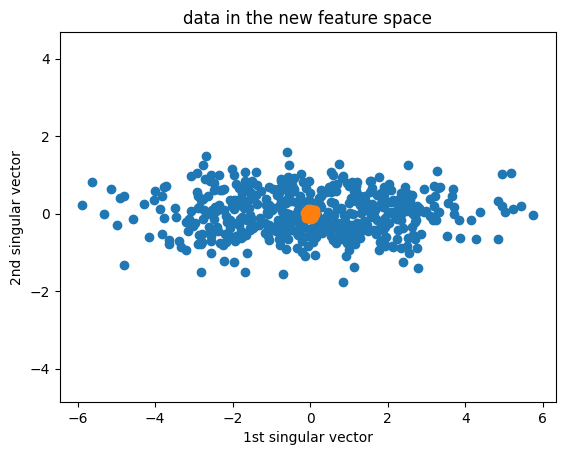

In [5]:
# show ouput from svd is the same
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

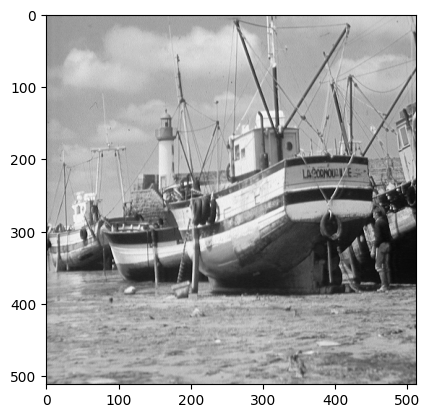

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

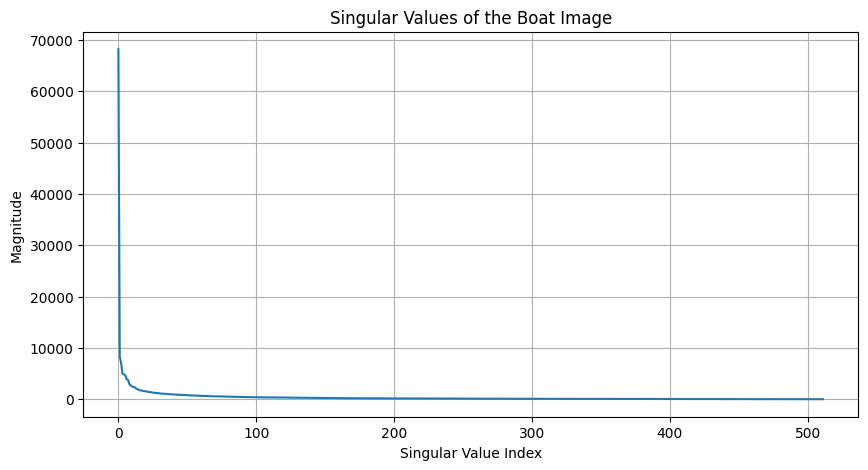

In [7]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.figure(figsize=(10, 5))
plt.plot(s)
plt.title("Singular Values of the Boat Image")
plt.xlabel("Singular Value Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

Notice you can get the image back by multiplying the matrices back together:

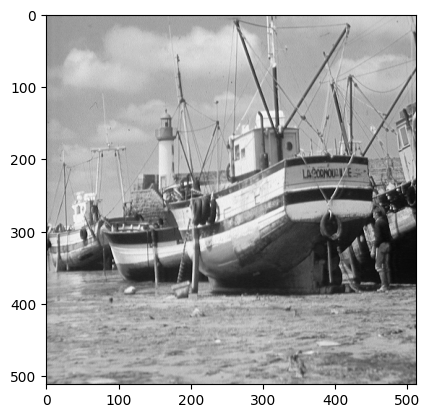

In [8]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [9]:
scopy = s.copy()
scopy[1:] = 0


c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

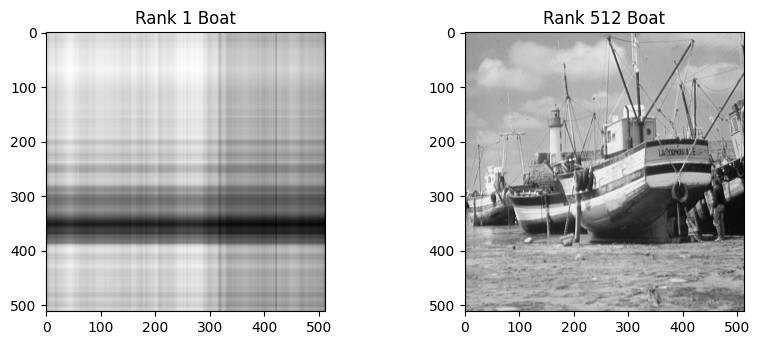

In [10]:
boat_app = u @ np.diag(scopy) @ vt

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

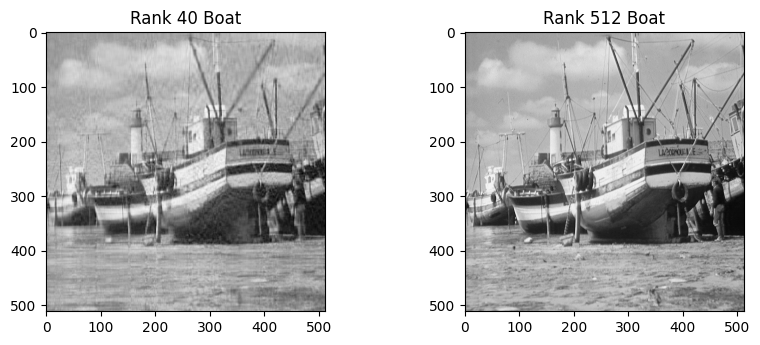

In [11]:
scopy_1 = s.copy()
scopy_1[40:] = 0
boat_app_1 = u @ np.diag(scopy_1) @ vt

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app_1, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with classification
2. no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

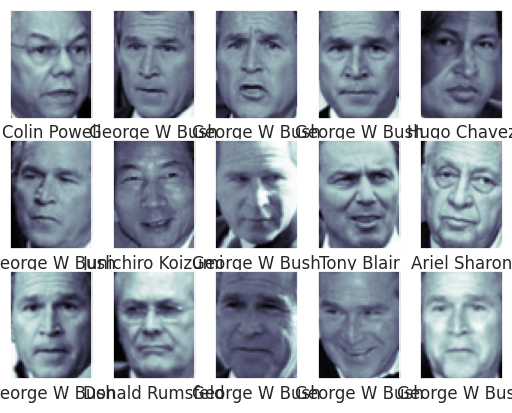

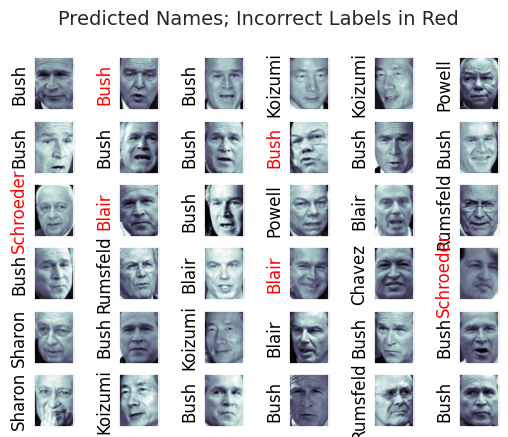

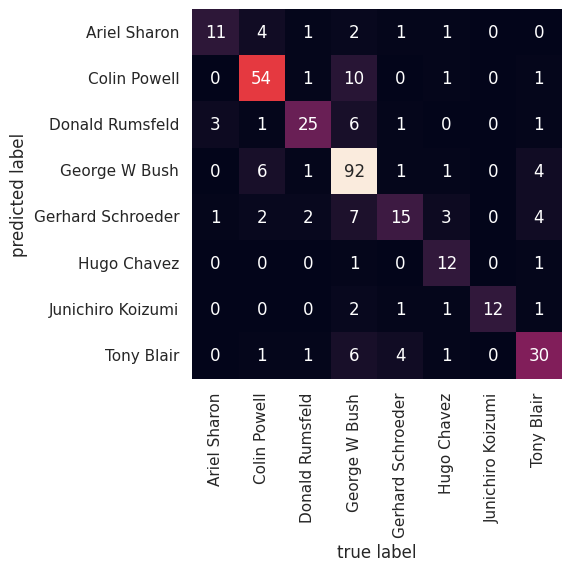

Accuracy =  0.744807121661721


In [22]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))



```
# This is formatted as code
```

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

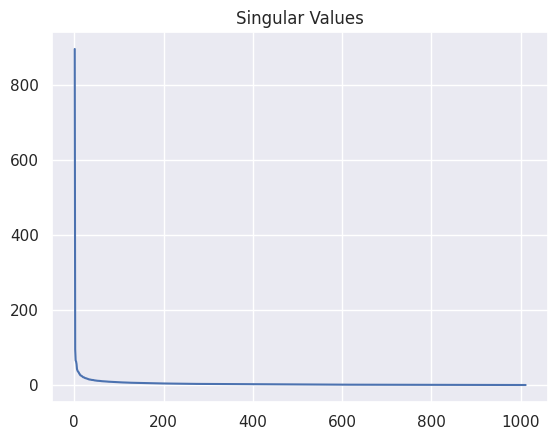

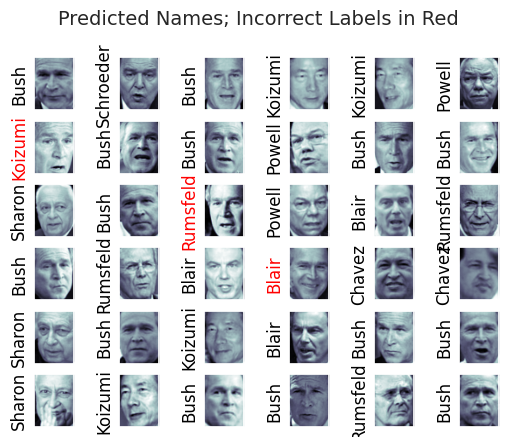

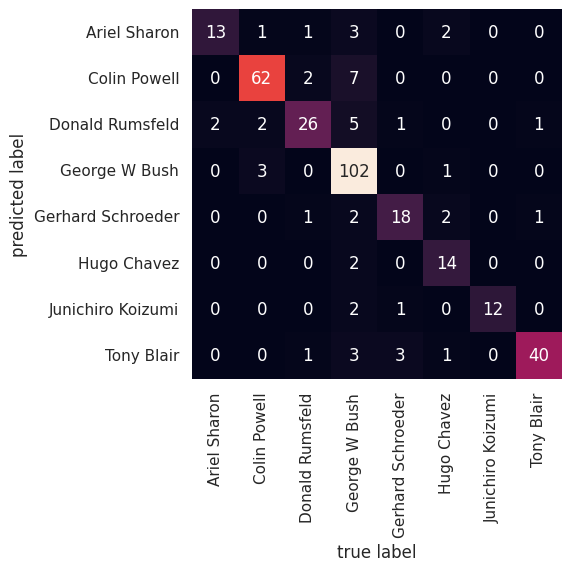

Accuracy =  0.8516320474777448


In [23]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six month period, for each of 9000 users across the 210 content categories that Facebook assigns to pages.

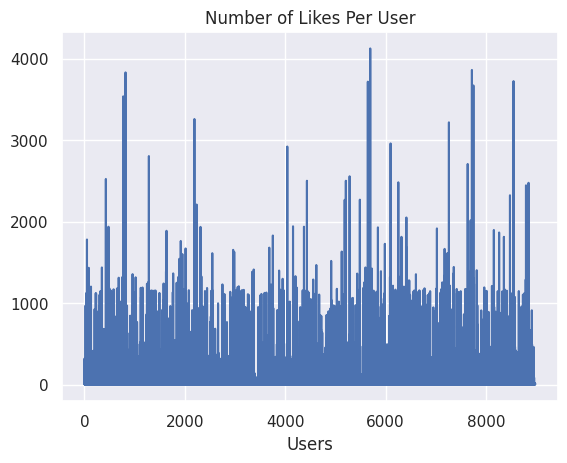

In [14]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:,1:]
FBSnorm = np.linalg.norm(FBSpatial,axis=1,ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using few singular vectors. And anomalous users can be easily identified.

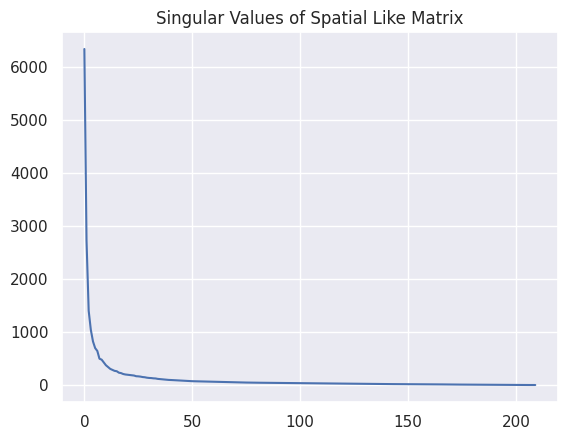

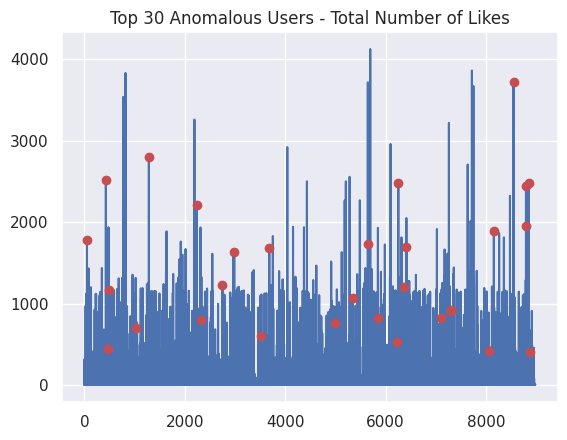

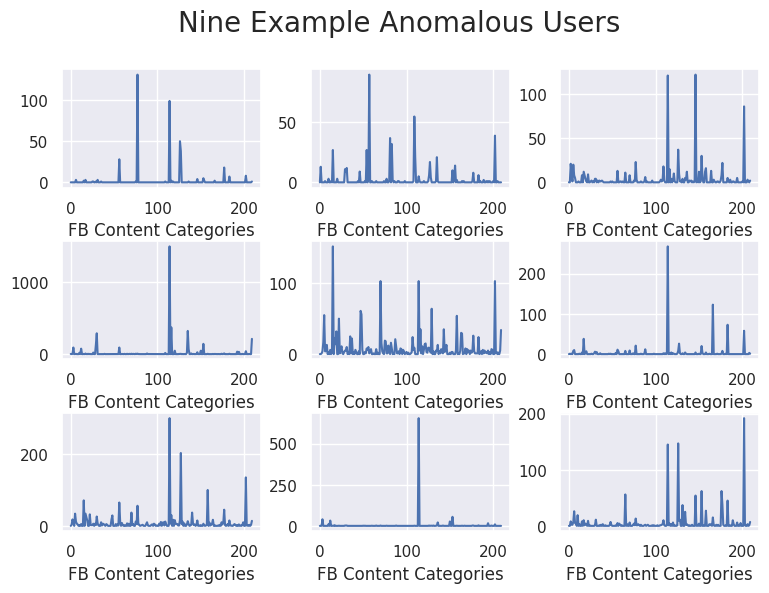

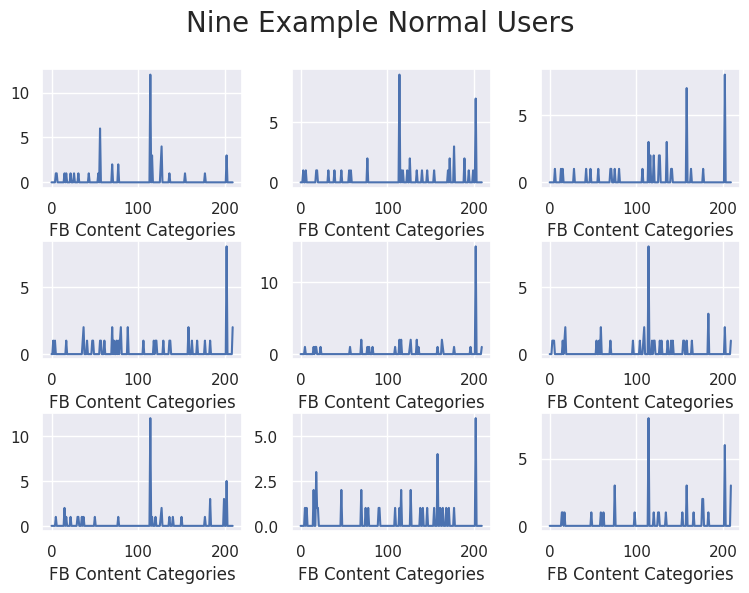

In [28]:

# Compute the square of the singular values
squared_singular_values = s ** 2

# Compute the total variance
total_variance = sum(squared_singular_values)

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(squared_singular_values)

# Determine R where 95% of the variance is captured
R = np.argmax(cumulative_variance / total_variance > 0.95) + 1

# print(R)
##############################
u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

RANK = 6
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Total Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users',size=20)
plt.show()

# normal users
set = np.argsort(Onorm)[0:7000]
# that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users',size=20)
plt.show()